In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import show

In [31]:
file = pd.read_csv("D:\\datasets\\daily_price\\daily_price.csv")
df = file.copy()
df.sample(10)

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
4315,Uttar Pradesh,Jaunpur,Shahganj,Pointed gourd (Parval),Pointed gourd (Parval),FAQ,2550.0,2650.0,2600.0
2576,Punjab,Moga,Baghapurana,Capsicum,Capsicum,FAQ,1000.0,1500.0,1200.0
5526,West Bengal,Nadia,Chakdah,Masur Dal,Masur Dal,FAQ,10200.0,10400.0,10300.0
717,Haryana,Rewari,Kosli,Tomato,Other,FAQ,5000.0,5000.0,5000.0
4037,Uttar Pradesh,Farukhabad,Farukhabad,Maize,Hybrid,FAQ,1700.0,1825.0,1800.0
1354,Kerala,Idukki,Kattappana,Cardamoms,Other,FAQ,95000.0,115000.0,110000.0
2751,Rajasthan,Chittorgarh,Chittorgarh,Bitter gourd,Other,FAQ,2400.0,3000.0,2800.0
3068,Telangana,Ranga Reddy,Kukatpally(Rythu Bazar),Banana - Green,Banana - Green,FAQ,1200.0,1200.0,1200.0
2872,Rajasthan,Udaipur,Udaipur,Bajra(Pearl Millet/Cumbu),Bold,FAQ,2350.0,2550.0,2450.0
1164,Kerala,Alappuzha,Harippad,Banana - Green,Other,FAQ,4000.0,4500.0,4000.0


In [32]:
df = df.drop_duplicates()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 0 to 5556
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        5557 non-null   object 
 1   District     5557 non-null   object 
 2   Market       5557 non-null   object 
 3   Commodity    5557 non-null   object 
 4   Variety      5557 non-null   object 
 5   Grade        5557 non-null   object 
 6   Min Price    5557 non-null   float64
 7   Max Price    5557 non-null   float64
 8   Modal Price  5557 non-null   float64
dtypes: float64(3), object(6)
memory usage: 434.1+ KB


In [34]:
lbl = df['Modal Price']
num_df = df[['Min Price','Max Price']]
df = df.drop(['Modal Price','Min Price','Max Price'],axis=1)
encoded_df = pd.get_dummies(df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ready_df = pd.concat([num_df,encoded_df],axis=1)
ready_df

,Min Price,Max Price,State_Andhra Pradesh,State_Chandigarh,State_Chattisgarh,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,...,Variety_Yellow,Variety_Yellow (Black),Variety_Zinga(Zambo-A),Variety_Zinga(Zambo-B),Variety_Zinga(Zambo-C),Variety_other,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small
0,3200.0,3400.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,700.0,1500.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1400.0,1800.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4059.0,7589.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4778.0,6160.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,3000.0,3200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5553,5000.0,5200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5554,5500.0,5700.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5555,1250.0,1350.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
test_df = ready_df[['Min Price','Max Price']]
test_df['Label'] = lbl
Corr = test_df.corr()
Corr['Label'].sort_values(ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_8604\3450881141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Label'] = lbl


Label        1.000000
Max Price    0.993530
Min Price    0.990916
Name: Label, dtype: float64

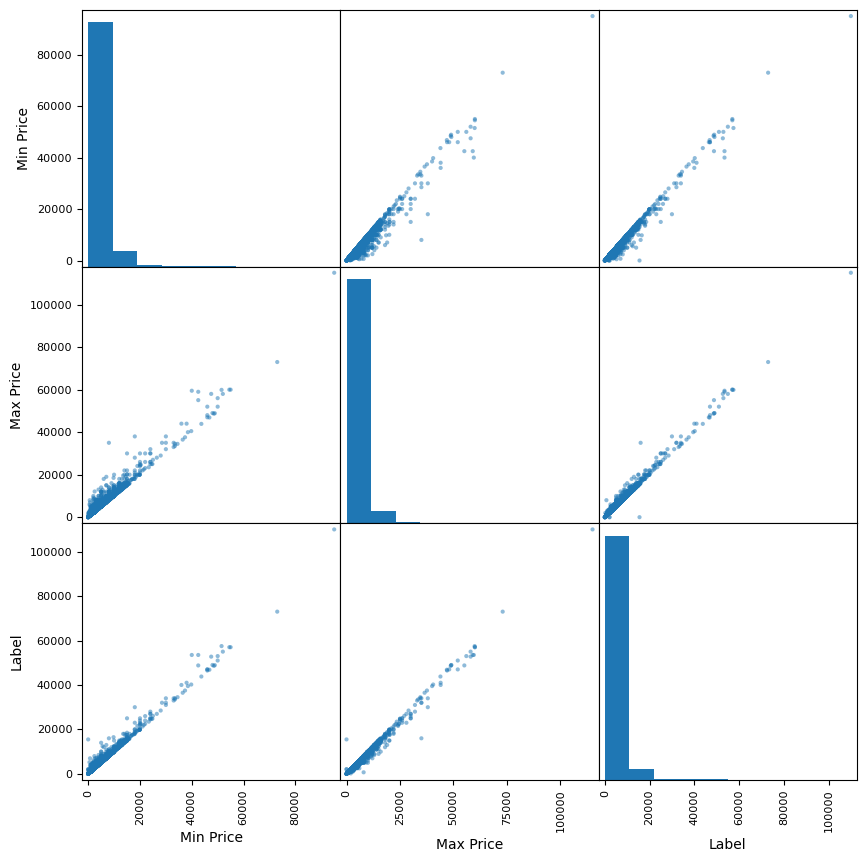

In [36]:
pd.plotting.scatter_matrix(test_df,figsize=(10,10))
show()

In [37]:
xtr , xts , ytr , yts = train_test_split(ready_df,lbl,test_size=0.2,random_state=42)

In [38]:
model = LinearRegression().fit(xtr,ytr)
model.score(xtr,ytr)*100

99.70400135275015

In [39]:
model.score(xts,yts)*100

99.75673280462277

In [40]:
model.score(ready_df,lbl)*100

99.71067395144789